# Merkmal Korrelationen
## Allgemein


In [1]:
import pandas
import seaborn as sns
import os
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_15_bis_22/absMesswerte/merkmale.csv")
featuresDf.describe()

,Unnamed: 0,Zeitstempel in Unixzeit,Anzahl der Messwerte,Belichtungszeit in ns,Breitengrad,Geschwindigkeit in km/h,Hoehe in m ueber WGS 84,Laengengrad,Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,100976.000000,1.009760e+05,100976.000000,1.009760e+05,100976.000000,100976.000000,1935.000000,100976.000000,5.114800e+04,1.009760e+05,...,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000,100976.000000
mean,50487.500000,1.521788e+12,19.367454,1.627997e+07,53.600822,14.825229,70.983613,10.117386,6.607393e+13,7.109607e+13,...,0.975787,5.977523,8.171251,0.070720,0.227236,0.816487,1.941209,2.331521,0.244010,0.328385
std,29149.404728,6.253450e+08,0.610286,1.007035e+07,0.026173,3.788046,2.540434,0.064359,6.623119e+13,5.256696e+13,...,1.911769,11.983576,13.390825,0.055202,0.395167,0.556003,1.486355,1.653870,0.105732,0.345544
min,0.000000,1.521124e+12,5.000000,6.435000e+05,53.533375,5.004000,64.299440,9.853853,7.500496e+12,7.500366e+12,...,0.003090,0.002950,0.004410,0.000220,0.000080,0.055590,0.054310,0.066410,0.014830,0.008940
25%,25243.750000,1.521212e+12,19.000000,8.963045e+06,53.582530,12.348000,69.145140,10.096096,1.369082e+13,3.100689e+13,...,0.205140,1.038828,1.456968,0.024020,0.007060,0.452920,1.019230,1.207050,0.154980,0.084020
50%,50487.500000,1.521815e+12,19.000000,1.000184e+07,53.607080,15.191999,71.069275,10.128583,3.203304e+13,4.411213e+13,...,0.440155,2.261685,3.326940,0.054910,0.023450,0.663445,1.503890,1.823990,0.234330,0.153130
75%,75731.250000,1.522248e+12,20.000000,2.999632e+07,53.614410,17.531998,72.942380,10.156504,1.705829e+14,1.087596e+14,...,1.017915,5.347285,8.281130,0.109323,0.240043,1.008923,2.312420,2.877692,0.330642,0.489943
max,100975.000000,1.523024e+12,23.000000,3.287369e+07,53.656776,24.948000,77.023680,10.229659,1.762332e+14,1.762331e+14,...,69.803070,185.032870,185.277580,0.352040,2.160530,8.354820,13.602680,13.611670,0.593330,1.469870


In [4]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Unnamed: 0', 'Zeitstempel in Unixzeit', 'Anzahl der Messwerte',
       'Belichtungszeit in ns', 'Breitengrad', 'Geschwindigkeit in km/h',
       'Gier Messwerte in rad', 'Hoehe in m ueber WGS 84', 'Laengengrad',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Start der Belichtung in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2',
       'Zeitstempel der Messwerte in ns',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'Gier-Aenderung

## Geografische Koordinaten

### Einleitung
Durch einem matplotlib scatter Plot kann die Beziehung von Längengrad zu Breitengrad dargestellt werden.   
Dies veranschaulicht die geografischen Koordinaten der erfassten Daten. Sobald die Belichtungszeit einer Aufnahme   
startet wird die letzte erfasste GPS Position abgespeichert. Der alpha Wert der Blauen Farbe gibt die Dichte von GPS Postionen an.   
Positionsangaben werden meistens in rechteckigen kartesischen Koordinatensystemen dargestellt.    
Die Oberfläche der Erde ist allerdings gekrümmt. Damit die Oberfläche in rechteckiger Form dargestellt werden kann   
durch Verzerrung eine Kartenprojektion durchgeführt werden. Längengrad und Breitengrad sind ellipsoidische Koordinaten, welche mit   
Kartenprojektion in ebene Koordinaten gebracht werden können. Eine bekannte möglichlkeit dies zu erzielen ist dabei das Universal Transverse System (UTS)   
anzuwenden. Bei diesem Plot werden einfach Längengrad und Breitengrad gegenübergestellt.


### Erwartung
Die GPS Koordinaten werden mit unterschiedlicher Häufigkeit erfasst. Dies hat mehrere Gründe. Bei einer geringen Geschwindikeit auf einem Weg   
werden die Koordinaten häufiger abgefragt als mit einer hohen Geschwindikeit, weil in einer kürzeren Zeit mehr Distanz zurückgelegt wird.   
Desweiteren werden Daten nur erfasst, wenn die Geschwindigkeit zwischen 5 km/h und 25 km/h liegt. Auf einer Wegstrecke   
kann es vorkommen, dass der Benutzer der Android App die Datenerfassung gestoppt hat oder die Anwendung abgestürzt ist.   
Nachdem das Smartphone in den Ruhemodus gekommen ist. Da der Nutzer inaktiv war wird die Erfassung der Daten auch pausiert.      
TODO Verweis das GPS koordinaten ungenau sind

### Ergebnis

Siehe Plot "GPS Koordinaten".

### Auswertung

Text(0.5,1,'GPS Koordinaten')

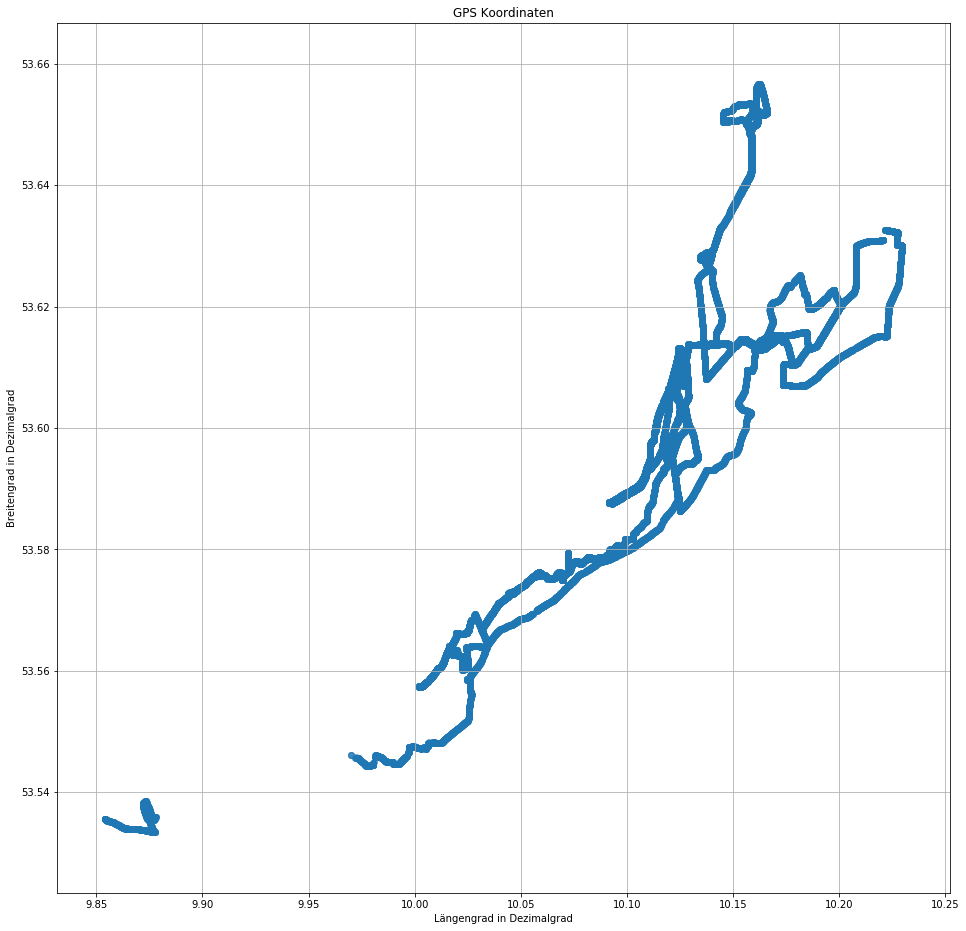

In [5]:
fig = plt.figure(figsize=(16,16))
ax  = fig.add_subplot(111)
ax.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], alpha = 0.2)
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.grid()
ax.set_title("GPS Koordinaten")

## Übersicht von Korrelationen

### Einleitung 

Die folgenden Plots bieten eine Übersicht über die Beziehungen der Merkmale zueinander.

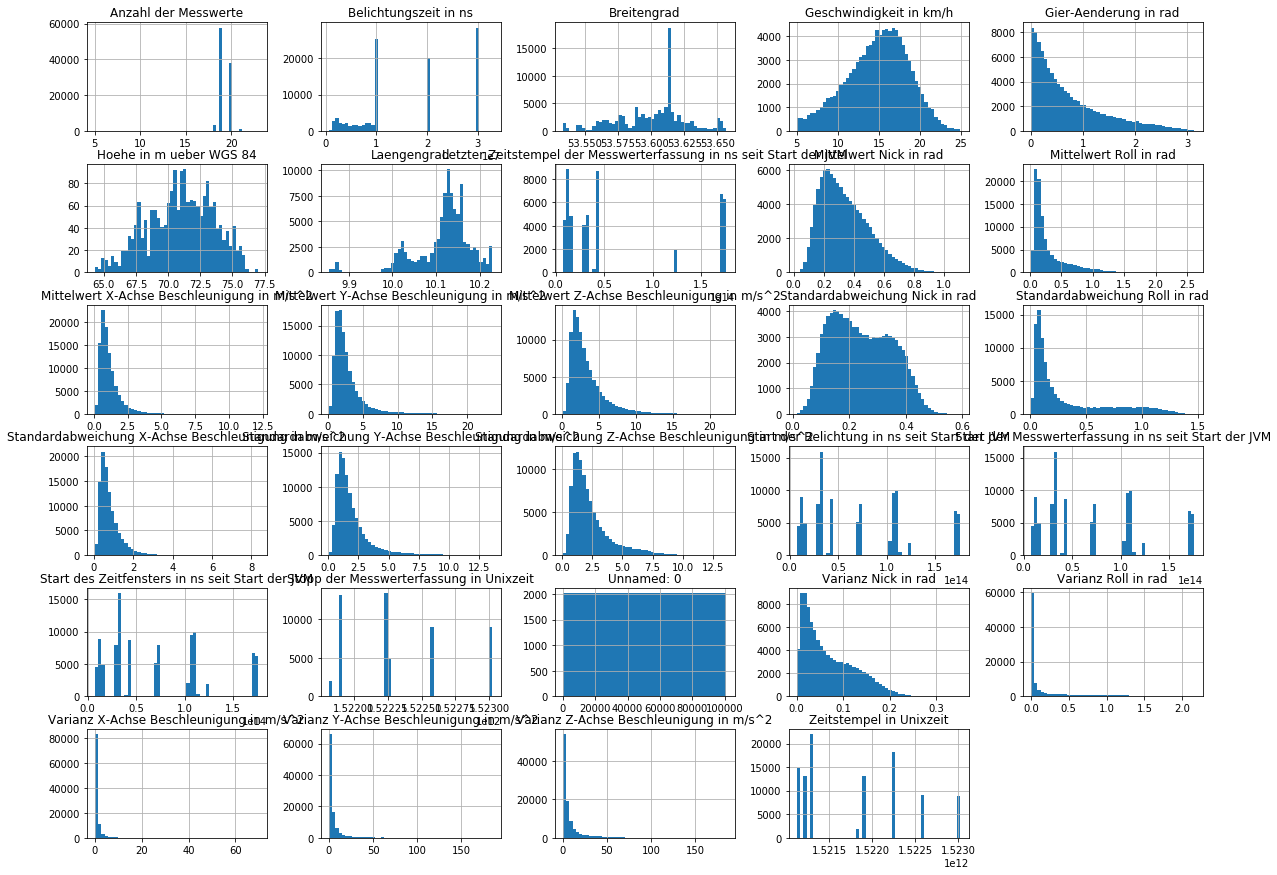

In [6]:
# Als Histogramdiagramm werden alls Merkmale dargestellt. 
# Dadurch ist ein erster Eindruck über den Wertereich der Daten möglich
featuresDf.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
accDf = featuresDf[['X-Achse Beschleunigungswerte in m/s^2','Y-Achse Beschleunigungswerte in m/s^2','Z-Achse Beschleunigungswerte in m/s^2','Mittelwert X-Achse Beschleunigung in m/s^2',
                    'Mittelwert Y-Achse Beschleunigung in m/s^2','Mittelwert Z-Achse Beschleunigung in m/s^2','Varianz X-Achse Beschleunigung in m/s^2',
                    'Varianz Y-Achse Beschleunigung in m/s^2','Varianz Z-Achse Beschleunigung in m/s^2',
                    'Standardabweichung X-Achse Beschleunigung in m/s^2','Standardabweichung Y-Achse Beschleunigung in m/s^2',
                    'Standardabweichung Z-Achse Beschleunigung in m/s^2']]
accDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100976 entries, 0 to 100975
Data columns (total 12 columns):
X-Achse Beschleunigungswerte in m/s^2                 100976 non-null object
Y-Achse Beschleunigungswerte in m/s^2                 100976 non-null object
Z-Achse Beschleunigungswerte in m/s^2                 100976 non-null object
Mittelwert X-Achse Beschleunigung in m/s^2            100976 non-null float64
Mittelwert Y-Achse Beschleunigung in m/s^2            100976 non-null float64
Mittelwert Z-Achse Beschleunigung in m/s^2            100976 non-null float64
Varianz X-Achse Beschleunigung in m/s^2               100976 non-null float64
Varianz Y-Achse Beschleunigung in m/s^2               100976 non-null float64
Varianz Z-Achse Beschleunigung in m/s^2               100976 non-null float64
Standardabweichung X-Achse Beschleunigung in m/s^2    100976 non-null float64
Standardabweichung Y-Achse Beschleunigung in m/s^2    100976 non-null float64
Standardabweichung Z-Achse Beschle

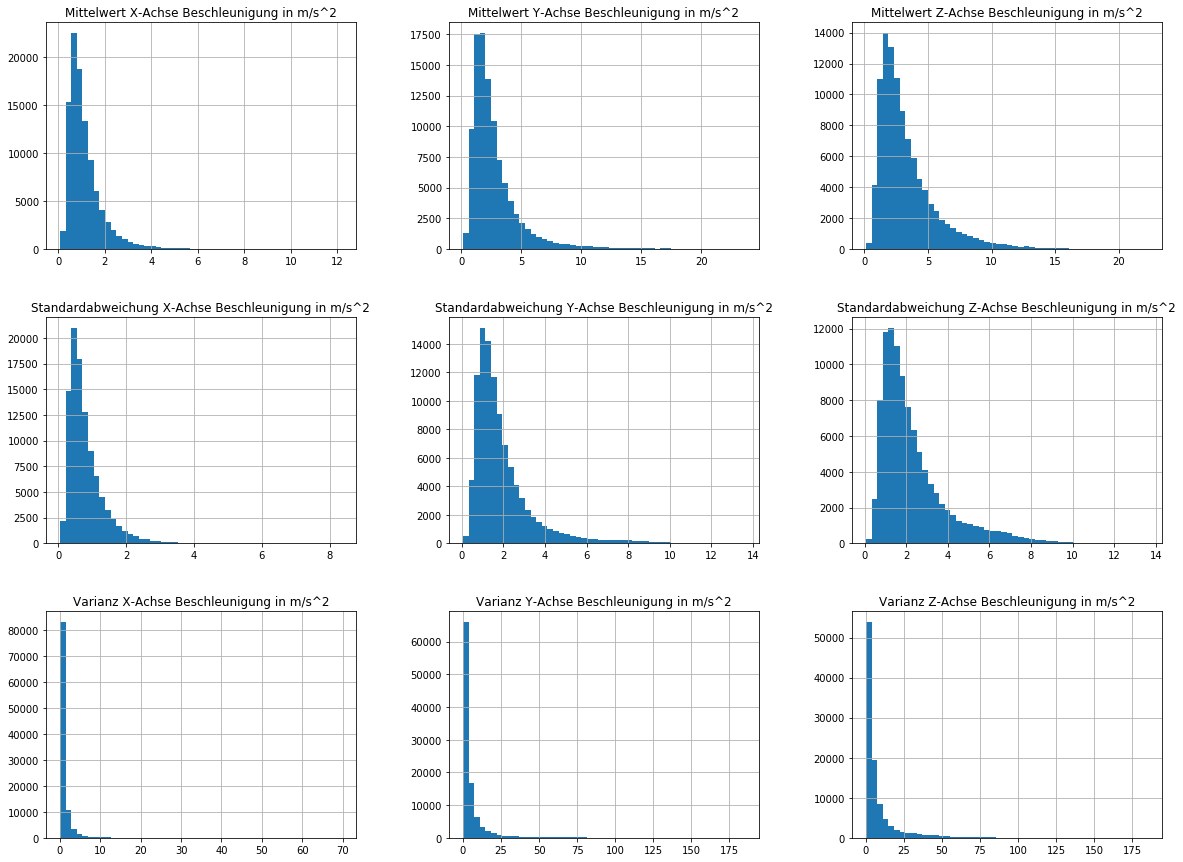

In [8]:
accDf.hist(bins=50, figsize=(20,15))
plt.show()

### Seaborn pairplot

Mit der Seaborn Funktion pairplot können Variablen gegenübergestellt werden. Dies ist interessant,um einen      
ersten Überblick zu bekommen. In jeder Reihe des Gitter-Plots wird eine Variable geplottet und mit    
den anderen Variablen in dem Spalten des Rasters gegenübergestellt.    
Dabei werden die Diagonalen Achsen als Blockdiagramm dargestellt, welche das Verteilungsverhältnis der    
einzelnen Variablen zeigt.  

### Einleitung Beschleunigungssensordaten

In den folgenden Diagrammen wird die Geschwindigkeit gegen die berechneten Merkmale aus den Beschleunigungssensordaten der X, Y und   
Z-Achse innerhalb eines Zeitfensters dargestellt. Berechnet wurden der Mittelwert, Varianz und Standardabweichung der Achsen.    

### Erwartung

Erwartet wird das der Mittelwert, Varianz und Standardabweichung mit zunehmender Geschwindigkeit tendenziell auch zunimmt.   
Eine Abweichung dieser Annahme müsste sich durch verschiedene Oberflächenqualitäten des Weges ergeben. Eine Wegstrecke mit   
vielen Unebenheiten müsste relativ hohe Werte ergeben auch bei einer geringen Geschwindikeit.  


### Ergebnis

Siehe Diagramme.

### Auswertung

Mit 49832 Merkmalen die 

In [9]:
featuresDf.shape

(100976, 36)

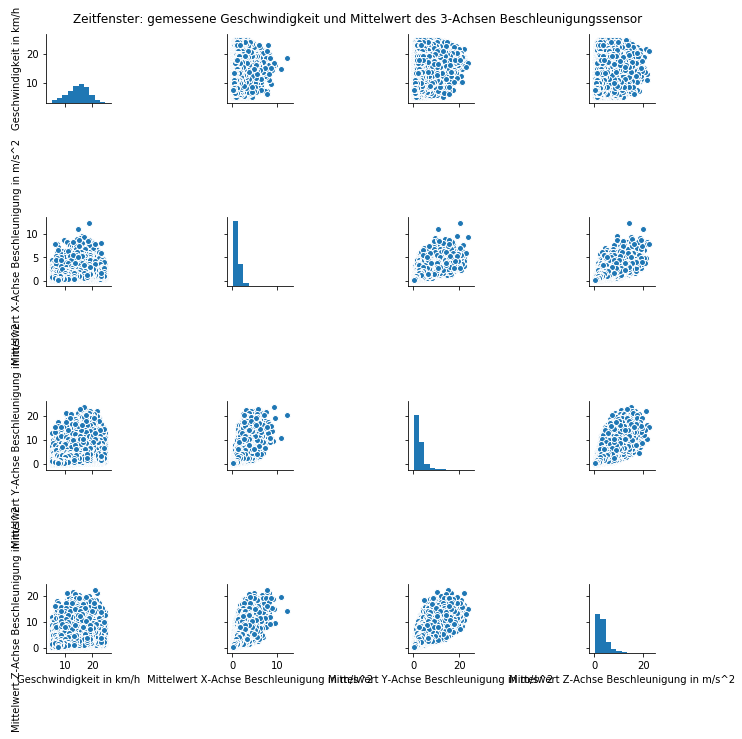

In [10]:
# Die Geschwindigkeit wird den Mittelwert der Beschleunigungssensordaten X,Y,Z gegenübergestellt.
# Hier werden auch die Mittelwerte miteinander geplottet.
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert X-Achse Beschleunigung in m/s^2',
                             'Mittelwert Y-Achse Beschleunigung in m/s^2',
                             'Mittelwert Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(10,10)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert des 3-Achsen Beschleunigungssensor")
g.savefig("Zeitfenster_geschwindigkeit_mittelwert_3-Achsen-Beschleunigungssensor_mit_abs.png")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor')

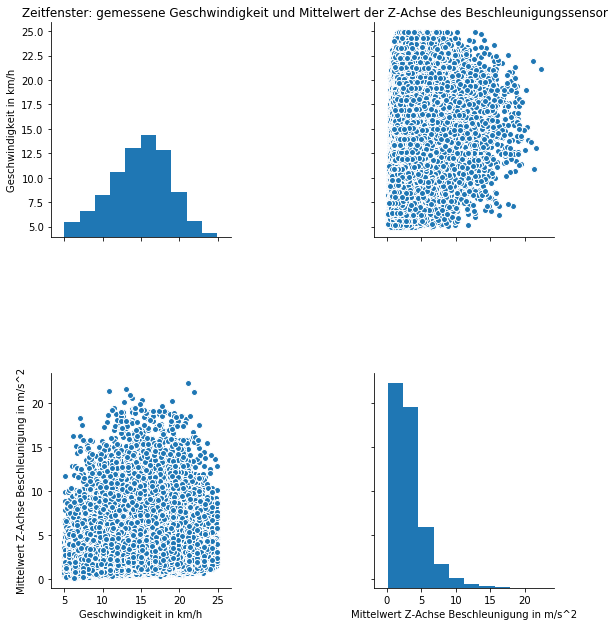

In [11]:
# Geschwindigkeit und Mittelwert der Beschleunigungssensor Z-Achsen Messwerte eines Zeitfensters
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(10,10)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Mittelwert der Z-Achse des Beschleunigungssensor")

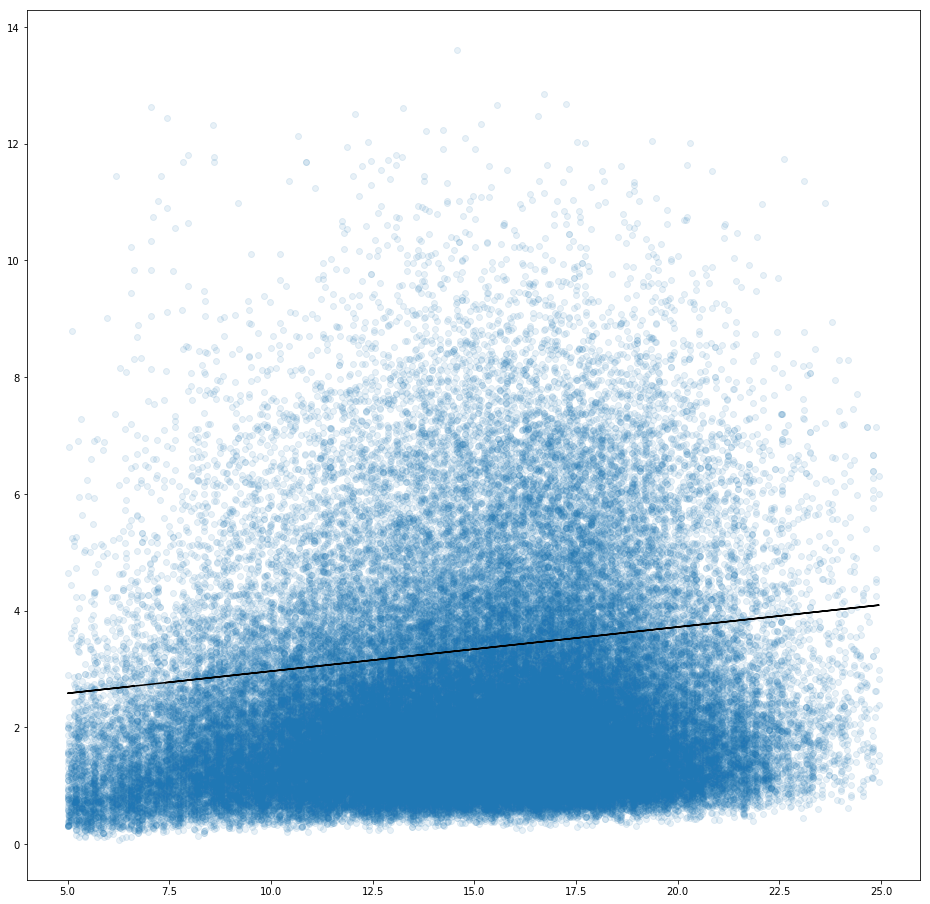

In [18]:
from scipy.stats import linregress
plt.figure(figsize=(16,16))
slope, intercept, r_value, p_value, std_err = linregress(featuresDf['Geschwindigkeit in km/h'],featuresDf['Mittelwert Z-Achse Beschleunigung in m/s^2']) 
plt.scatter(featuresDf['Geschwindigkeit in km/h'],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], label='original data', alpha = 0.1)
plt.plot(featuresDf['Geschwindigkeit in km/h'], intercept + slope*featuresDf['Geschwindigkeit in km/h'], 'k', label='fitted line')

In [17]:
slope

0.075748491680359395

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor')

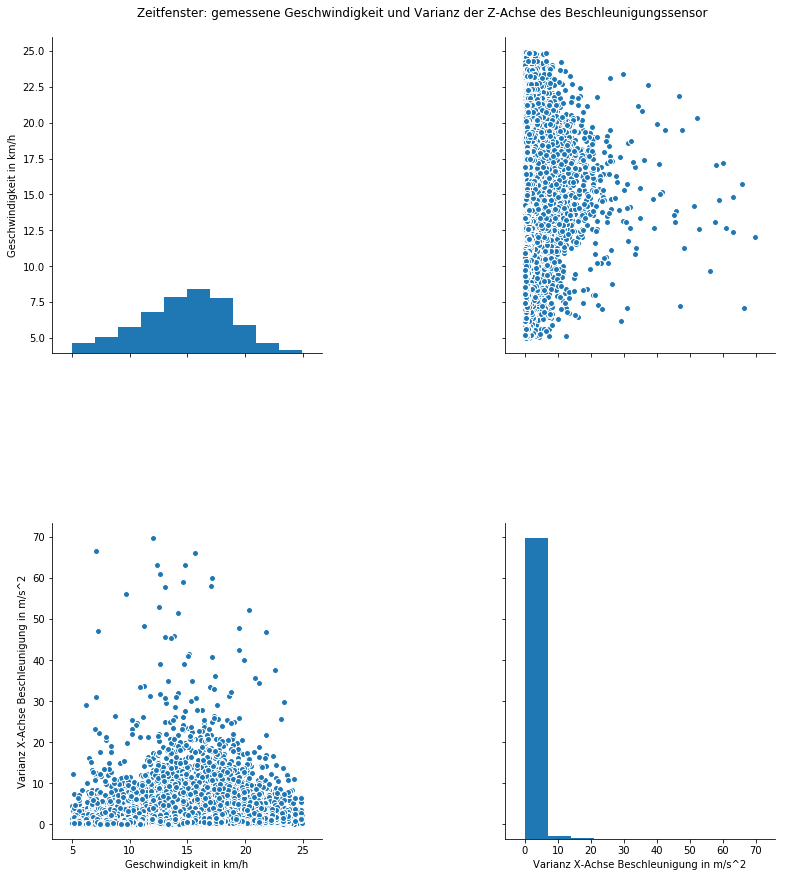

In [15]:
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Varianz X-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Varianz der Z-Achse des Beschleunigungssensor")

Text(0.5,0.98,'Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor')

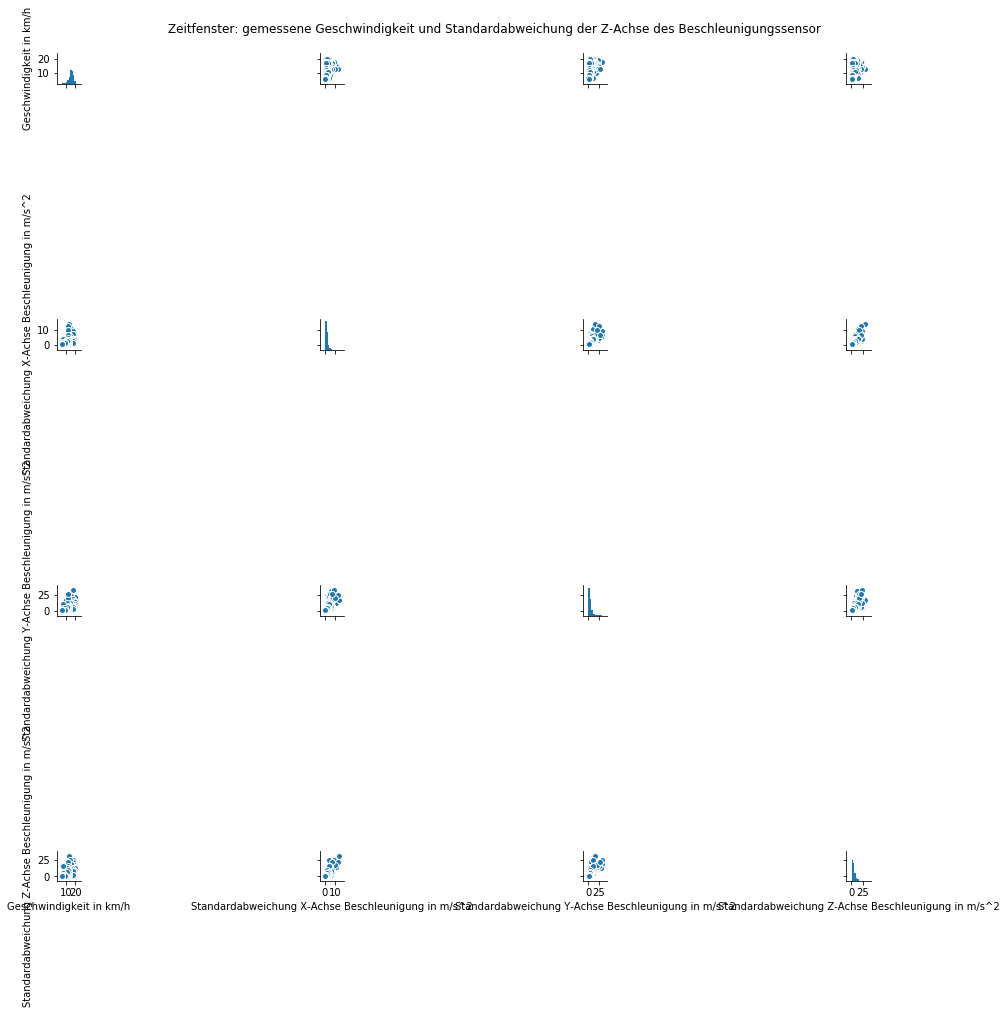

In [40]:
# Standardabweichung der Beschleunigungsensorachsen
g = sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung X-Achse Beschleunigung in m/s^2',
                             'Standardabweichung Y-Achse Beschleunigung in m/s^2','Standardabweichung Z-Achse Beschleunigung in m/s^2']])
g.fig.set_size_inches(14,14)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Zeitfenster: gemessene Geschwindigkeit und Standardabweichung der Z-Achse des Beschleunigungssensor")

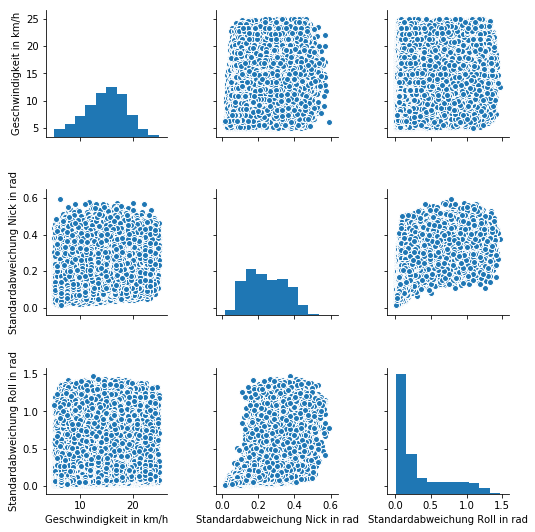

In [19]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung Nick in rad','Standardabweichung Roll in rad']])

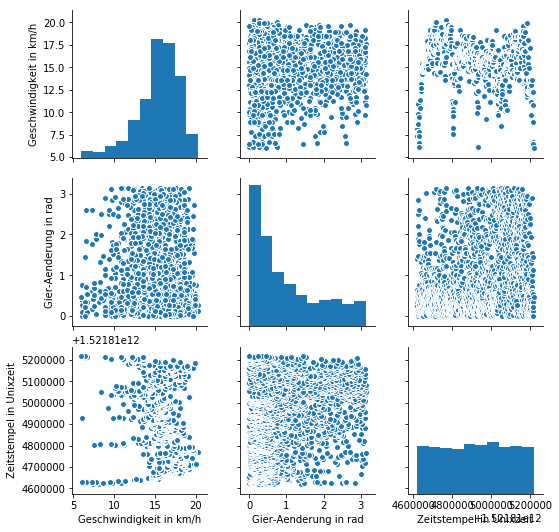

In [42]:
# Azimuth gibt die Winkeländerung in Rad an von Start der Datenerfassung bis zum Stopp dieser. 
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Gier-Aenderung in rad','Zeitstempel in Unixzeit']])

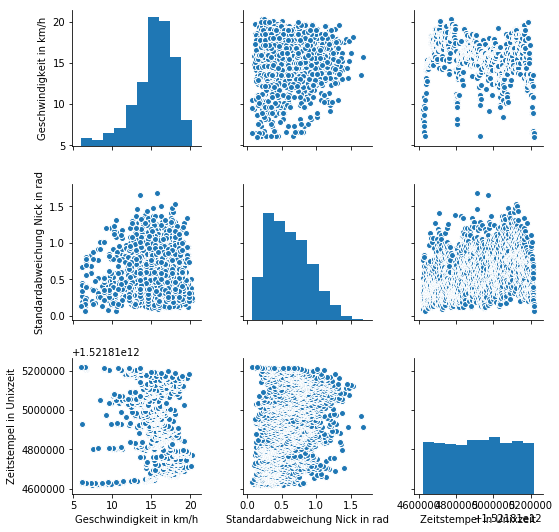

In [44]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Standardabweichung Nick in rad','Zeitstempel in Unixzeit']])

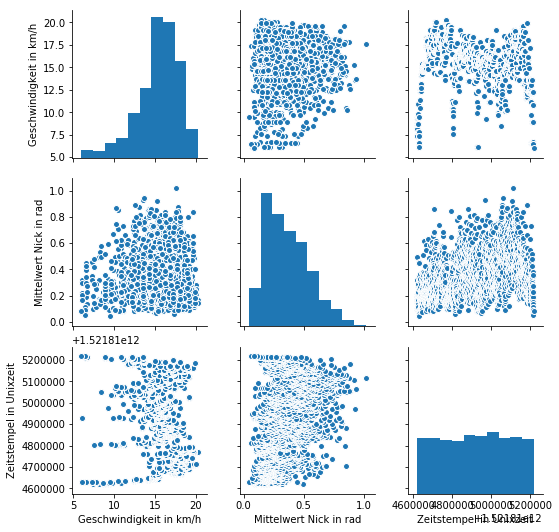

In [46]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Nick in rad','Zeitstempel in Unixzeit']])

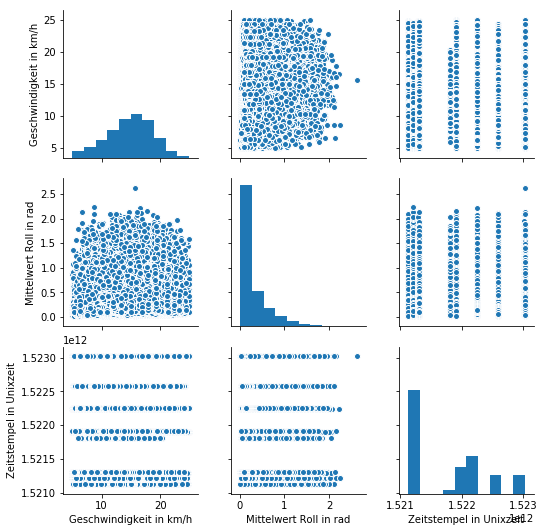

In [20]:
sns.pairplot(featuresDf[['Geschwindigkeit in km/h','Mittelwert Roll in rad','Zeitstempel in Unixzeit']])

In [21]:
# Zusammenhänge werden berechnet mit der Person Methode
corrMatrix = featuresDf.corr()
corrMatrix['Geschwindigkeit in km/h'].sort_values()

Stopp der Messwerterfassung in Unixzeit                              -0.149859
Breitengrad                                                          -0.080844
Hoehe in m ueber WGS 84                                              -0.047325
Laengengrad                                                          -0.041711
Start der Belichtung in ns seit Start der JVM                        -0.001815
Start des Zeitfensters in ns seit Start der JVM                      -0.001815
Start der Messwerterfassung in ns seit Start der JVM                 -0.001815
Anzahl der Messwerte                                                  0.011817
Gier-Aenderung in rad                                                 0.028407
Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM    0.056777
Varianz X-Achse Beschleunigung in m/s^2                               0.083572
Varianz Roll in rad                                                   0.087036
Varianz Z-Achse Beschleunigung in m/s^2             

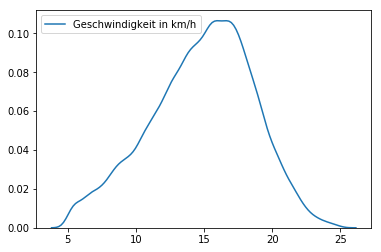

In [22]:
sns.kdeplot(featuresDf['Geschwindigkeit in km/h'])

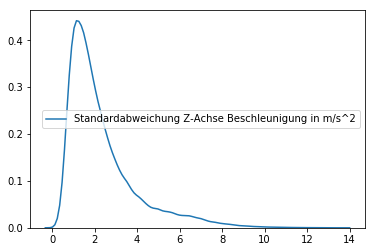

In [27]:
sns.kdeplot(featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'])

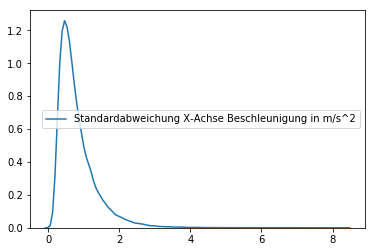

In [25]:
sns.kdeplot(featuresDf['Standardabweichung X-Achse Beschleunigung in m/s^2'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


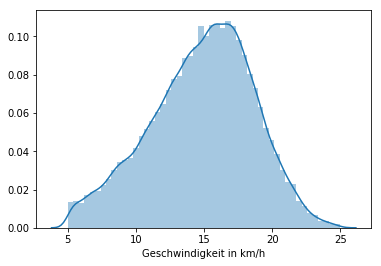

In [29]:
sns.distplot(featuresDf['Geschwindigkeit in km/h'])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


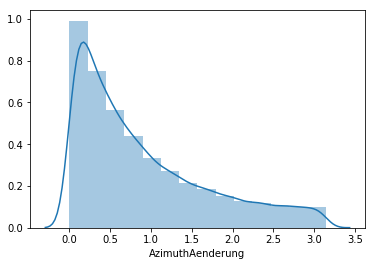

In [23]:
sns.distplot(featuresDf['AzimuthAenderung'],  bins=14)

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


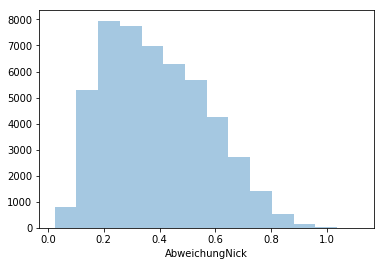

In [24]:
sns.distplot(featuresDf['AbweichungNick'], bins=14, kde=False)